In [35]:
import importlib
import matplotlib.pyplot as plt
import numpy as np

import read_data as rd
importlib.reload(rd)

import distance as dt
importlib.reload(dt)

import window_list as wl
importlib.reload(wl)

import clustering as cl 
importlib.reload(cl)

import centroid as cd
importlib.reload(cd)

<module 'centroid' from '/home/hj/cluster_mining_memory_network/centroid.py'>

In [5]:
ts_list = rd.read_data("elec", window=192, stride=192)
len(ts_list)

100%|██████████| 137/137 [00:00<00:00, 5707.16it/s]


43977

In [20]:
cluster_list_pm, centroid_list_pm = cl.pm_memnet(np.array(ts_list), dt.cosine_similarity_distance, 0.25)


# clustered_dist_list = dt.pairwise_distance(element_list, dt.cosine_similarity_with_fourier_distance)

157it [00:00, 1145.85it/s]


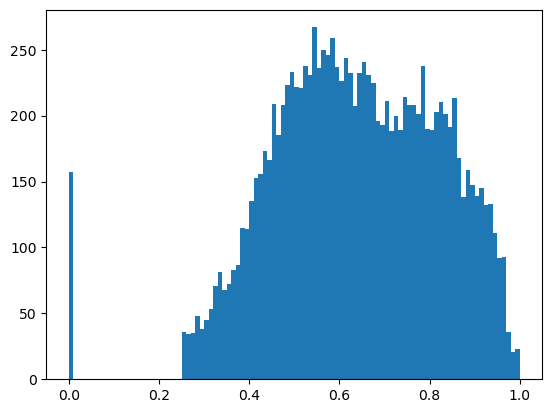

In [22]:
pm_dist_list = dt.pairwise_distance(centroid_list_pm, dt.cosine_similarity_distance)

ax = plt.hist(pm_dist_list, bins=100)
plt.show()

In [37]:
cluster_list_hdbscan, _ = cl.hdbscan_clustering(np.array(ts_list[0:len(ts_list)]), dt.cosine_similarity_distance)



/home/hj/cluster_mining_memory_network/distance.py:17: RuntimeWarning: invalid value encountered in double_scalars
  sim = np.dot(series_1, series_2) / (np.linalg.norm(series_1) * np.linalg.norm(series_2))


100%|██████████| 87/87 [02:46<00:00,  1.91s/it] 
87it [00:00, 585.79it/s]


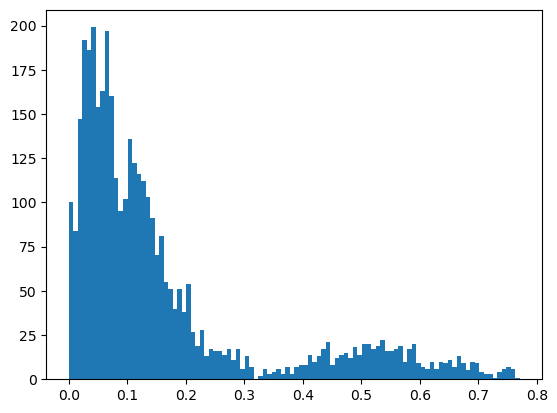

In [36]:
centroid_list_hdbscan_random = cd.medoid_extraction(cluster_list_hdbscan, dt.cosine_similarity_distance)


pairwise_distance_hdbscan = dt.pairwise_distance(centroid_list_hdbscan_random, dt.cosine_similarity_with_fourier_distance)

ax = plt.hist(pairwise_distance_hdbscan, bins=100)
plt.show()